<a href="https://colab.research.google.com/github/AlbertMdz/Optimizacion-Evolutiva/blob/master/Abejasmultiobjetivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import math
import pandas as pd
import itertools
%matplotlib inline
import time
import pylab as pl
from IPython import display

In [0]:
#Schaffer function N 

#minimize
def Schaffer(parametros):
  x=Symbol('x')
  f1=x**2
  f2=(x-2)**2
  Obj1=f1.subs([[x,parametros[0]]])
  Obj2=f2.subs([[x,parametros[0]]])
  return Obj1,Obj2 

In [0]:
#Binh and Korn function

#minimize
def BinhAndKorn(parametros):
  x=Symbol('x')
  y=Symbol('y')
  f1= 4*x**2+4*y**2
  f2=(x-5)**2+(y-5)**2
  #constrain
  g1=(x-5)**2+y**2
  g2=(x-8)**2+(y+3)**2
  ctr1=g1.subs([[x,parametros[0]],[y,parametros[1]]])
  ctr2=g2.subs([[x,parametros[0]],[y,parametros[1]]])
  if ctr1 <= 25  and ctr2 >= 7.7:
    Obj1=f1.subs([[x,parametros[0]],[y,parametros[1]]])
    Obj2=f2.subs([[x,parametros[0]],[y,parametros[1]]])
  else:
    Obj1=np.nan
    Obj2=np.nan
  
  return Obj1,Obj2 

In [0]:
def poblation_creation(VariableLimits,populationNumber):
  casos=list()
  for variable in  VariableLimits:
    elemento=list(np.linspace(variable["lower"],variable["upper"],populationNumber))
    casos.append(elemento)

  Convinations=itertools.product(*casos)
  
  #Poblacion=[ {"position"=[3,4],"speed"=[]}]
  Poblacion=list()
  for case in Convinations:
    Poblacion.append({"position":list(case),"speed":list( np.random.uniform(size=len(case)))})
  return Poblacion

METODOS SIN PREFERENCIA

In [0]:
def distanciaEuclideana(vectorX,vectorY):
  dist=math.sqrt(np.sum(np.array(vectorX)-np.array(vectorY)**2))
  return dist

In [0]:
def NoPreferenceMethod(objective,parametros,ideal):
      objs = objective(parametros)
      distancia =distanciaEuclideana(objs,ideal)
      return distancia

Metodo aposteriori de MOABC

In [0]:
def dominanciaPareto(objs1,objs2,case="minimo"):
  # selector de direccion 
  if case == "minimo":
    funcion = lambda obNew,obOld : obNew < obOld
  elif case == "maximo":
    funcion = lambda obNew,obOld :  obNew > obOld
  else:
    funcion = lambda obNew,obOld :  obNew < obOld
  dominance=False
  for index,ob1 in enumerate(objs1):
    if funcion(ob1,objs2[index]):
      dominance = True
    elif funcion(objs2[index],ob1):
      return False
  return dominance

In [0]:
def dominanciaParetoPobla(objs,soluciones):
  pareto = list()
  solucion=list()
  for  index, objBase in enumerate(objs):
    flag=True
    for population,objcompare in enumerate(objs):
      if dominanciaPareto(objcompare,objBase):
        #print("-------"+str(index)+"------")
        #print("dominanate")
        #print(objcompare)
        #print("dominado")
        #print(objBase)
        flag=False
        break 
    if flag:
      pareto.append(copy.deepcopy(objBase))
      solucion.append(copy.deepcopy(soluciones[index]))
  return pareto,solucion

In [0]:
def pso(objective,poblacion,CogConst,SocialConst,Inertia={"min":.01 ,"max":1,"delta":0.95,"gen":10},
        iterations=1,case="minimo",figure=False):
  # incializacion de inercia 
  Wi=Inertia["max"]
  Gbest={"value":[],"position":[]}
  #inicializaciones de mejores locales
  for particle in poblacion:
    perform = objective(particle["position"])
    particle["Pbest"]={"value":perform,"position":particle["position"]}


  for i in range(iterations):
  #ajuste de mejores  
    desempeños=list() 
    soluciones=list()
    print(i)
    for particle in poblacion:
      perform = objective(particle["position"])
      desempeños.append(perform)
      soluciones.append(particle["position"])
      if dominanciaPareto(perform,particle["Pbest"]["value"],case):
          particle["Pbest"]={"value":perform,"position":particle["position"]}  
    desempeños.extend(Gbest["value"])
    soluciones.extend(Gbest["position"])
    pareto,sol=dominanciaParetoPobla(desempeños,soluciones)
    Gbest["value"]=pareto
    Gbest["position"]=sol

  

    for particle in poblacion:
      #generacion de aleatorios 
      R0=np.random.uniform()
      R1=np.random.uniform()
      R2=np.random.uniform()
      #velocity update
      #Componente Inercial
      #iner=list(map((Wi).__mul__, particle["speed"]))
      iner=np.array(particle["speed"])*Wi*R0
      #(iner)
      #Componente cognitivo
      cog=CogConst*R1*np.array(particle["Pbest"]["position"])-np.array(particle["position"])
      #print(cog)
      #Componente social
      #print(len(Gbest["position"]))
      RGBint=np.random.randint(len(Gbest["position"]))
      social=SocialConst*R2*np.array(Gbest["position"][RGBint])-np.array(particle["position"])
      #print(social)
      vel=iner+cog+social
      #print(vel)
      #print(particle["position"])
      pos = np.array(particle["position"]) + vel
      #print(pos)
      
      #input()
      particle["position"] = list(pos)
      particle["speed"] = list(vel)
    #print(poblacion)
    #ajustar inertia 
    if i % Inertia["gen"]==0 and Wi>Inertia["min"] :
      Wi=Wi*Inertia["delta"]
  return poblacion,Gbest

Generacion:  0


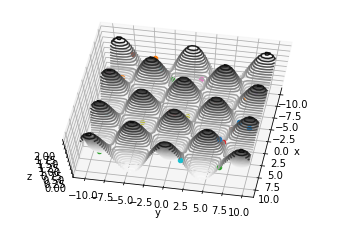

Generacion:  75


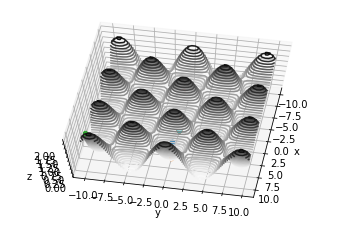

Griewank function: 
Generacion: 150
X:  0.0 Y:  0.0 F(x,y):  0.0


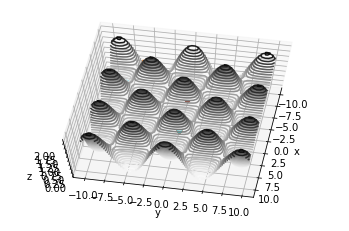

Generacion:  0


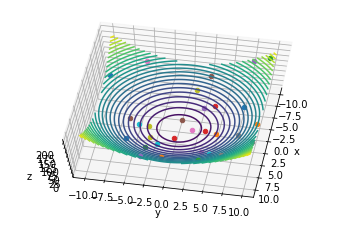

Generacion:  75


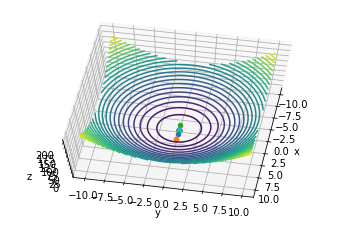

Sphere function: 
Generacion: 150
X:  0.0 Y:  0.0 F(x,y):  0.0


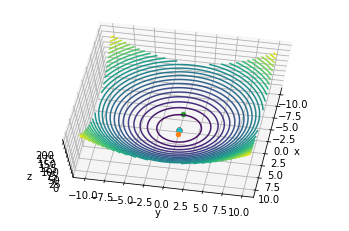

Generacion:  0


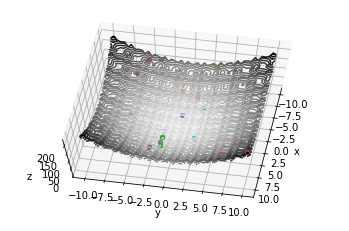

Generacion:  75


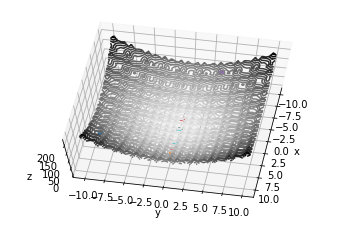

Rastrigin function: 
Generacion: 150
X:  0.0 Y:  0.0 F(x,y):  0.0


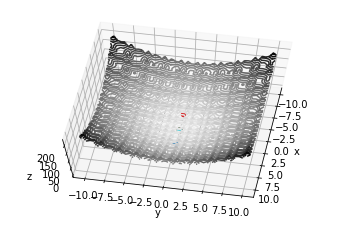

In [1]:
import math
import random
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits import mplot3d


def f1(x, y):  # Griewank function
    sum = 0
    prod = 1
    xi = x
    sum = sum+((math.pow(xi, 2))/4000)
    prod = prod*math.cos((xi/math.sqrt(1)))
    xi = y
    sum = sum+((math.pow(xi, 2))/4000)
    prod = prod*math.cos((xi/math.sqrt(2)))
    r = sum-prod+1
    return r


def f2(x, y):  # Sphere function
    sum = 0
    xi = x
    sum = sum + math.pow(xi, 2)
    xi = y
    sum = sum + math.pow(xi, 2)
    return sum


def f3(x, y):  # Rastrigin Sphere Function
    sum = 0
    xi = x
    sum = sum + (math.pow(xi, D) - 10*math.cos(2*math.pi*xi))
    xi = y
    sum = sum + (math.pow(xi, 2) - 10*math.cos(2*math.pi*xi))
    r = 10*D + sum
    return r


def f(num, x, y):
    if num == 1:
        return f1(x, y)
    elif num == 2:
        return f2(x, y)
    else:
        return f3(x, y)


def grafica1(vX):
    # a,b son arreglos de 50 números en el rango (-2,2)
    a = np.linspace(-10, 10, RANGO)
    b = np.linspace(-10, 10, RANGO)
    #x=np.zeros((2, RANGO))

    x, y = np.meshgrid(a, b)
    # vectorize Permite que la función f(x,y) reciba como parámetros los vectores x,y
    Z = np.vectorize(f1)
    ax = plt.axes(projection='3d')
    # Dibuja la gráfica de f(x,y)
    ax.contour3D(x, y, Z(x, y), 20, cmap='Greys')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    for i in range(Pf):
        # Dibuja la población en la gráfica
        ax.scatter3D(vX[0, i], vX[1, i], f1(vX[0, i], vX[1, i]))
        ax.view_init(70, 10)
    plt.show()


def grafica2(vX):
    # a,b son arreglos de 50 números en el rango (-2,2)
    a = np.linspace(-10, 10, RANGO)
    b = np.linspace(-10, 10, RANGO)
    #x=np.zeros((2, RANGO))

    x, y = np.meshgrid(a, b)
    # vectorize Permite que la función f(x,y) reciba como parámetros los vectores x,y
    Z = np.vectorize(f2)
    ax = plt.axes(projection='3d')
    # Dibuja la gráfica de f(x,y)
    ax.contour3D(x, y, Z(x, y), 30, cmap='viridis')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for i in range(Pf):
        # Dibuja la población en la gráfica
        ax.scatter3D(vX[0, i], vX[1, i], f2(vX[0, i], vX[1, i]))
        ax.view_init(70, 10)
    plt.show()


def grafica3(vX):
    # a,b son arreglos de 50 números en el rango (-2,2)
    a = np.linspace(-10, 10, RANGO)
    b = np.linspace(-10, 10, RANGO)
    #x=np.zeros((2, RANGO))

    x, y = np.meshgrid(a, b)
    # vectorize Permite que la función f(x,y) reciba como parámetros los vectores x,y
    Z = np.vectorize(f3)
    ax = plt.axes(projection='3d')
    # Dibuja la gráfica de f(x,y)
    ax.contour3D(x, y, Z(x, y), 30, cmap='binary')

    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    for i in range(Pf):
        # Dibuja la población en la gráfica
        ax.scatter3D(vX[0, i], vX[1, i], f3(vX[0, i], vX[1, i]))
        ax.view_init(70, 10)
    plt.show()


def grafica(num, vX):
    if num == 1:
        grafica1(vX)
    elif num == 2:
        grafica2(vX)
    else:
        grafica3(vX)


def rand():  # Genera vector de números random
    return random.uniform(0, 1), random.uniform(0, 1)


def mejorPosicion(num):  # Encuentra individuo con mejor posición
    best = 0
    for i in range(Pf):
        if f(num, X[0, i], X[1, i]) < f(num, X[0, best], X[1, best]):
            best = i
    return best


RANGO = 50
D = 2

POBLACION = 50
GENERACIONES = 150
L = 20
Pf = 30  # Abejas empleadas
Po = POBLACION - Pf  # Abejas observadoras

X = np.zeros((2, Pf))  # Fuentes de Alimento
li = np.zeros(Pf)
apt = np.zeros(POBLACION)   # inicializa arreglo de aptitudes

xl = np.array([-10, -10])  # límite inferior
xu = np.array([10, 10])  # Límite superior


def inicializa():
    for i in range(Pf):
        X[:, i] = xl+(xu-xl)*rand()  # Inicializa fuentes aleatoriamente


def EtapaAbejasWorkers(num):
    for i in range(Pf):
        while(True):
            k = random.randint(0, Pf-1)  # Número aleatorio  tal que i!=k
            if k != i:
                break
        vi = np.array([0, 0])
        if f(num, X[0, i], X[1, i]) < f(num, X[0, k], X[1, k]):  # Si f(xi) < f(xk)
            for j in range(D-1):
                r = random.uniform(0, 1)  # random [0,1]
                vi[j] = X[j, i]+r*(X[j, i]-X[j, k])  # cij = xij + r*(xij-xkj)
        else:
            for j in range(D-1):
                r = random.uniform(0, 1)  # random [0,1]
                vi[j] = X[j, i]+r*(X[j, k]-X[j, i])  # cij = xij + r*(xkj-xij)
        if f(num, vi[0], vi[1]) < f(num, X[0, i], X[1, i]):  # si f(vi) < f(xi)
            X[:, i] = vi  # xi = vi
            li[i] = 0  # li =0
        else:
            li[i] += 1  # li = li+1


def EtapaAbejasUNLOOKERS(num):
    m = mejorPosicion(num)
    for i in range(Po):
        while(True):
            k = random.randint(0, Pf-1)  # Número aleatorio  tal que i!=k
            if k != m:
                break
        vm = np.array([0, 0])
        for j in range(D-1):
            r = random.uniform(0, 1)  # random [0,1]
            vm[j] = X[j, m] + r*(X[j, m]-X[j, k])  # vmj = xmj + r*(xmj - xkj)
        if f(num, vm[0], vm[1]) < f(num, X[0, m], X[1, m]):  # si f(vm) < f(xm)
            X[:, m] = vm  # xm = vm
            li[m] = 0  # lm = 0
        else:
            li[m] += 1  # lm = lm +1

def EtapaAbejaSCOUT():
    for i in range(Pf):
        if li[i] > L:
            X[:, i] = xl+(xu-xl)*rand()
            li[i] = 0


def AlgoritmoABC(num):
    inicializa()
    for i in range(GENERACIONES):
        if(i % 75 == 0):
            print("Generacion: ", i)
            grafica(num, X)  # Grafíca cada 75 Generaciones
        EtapaAbejasWorkers(num)
        EtapaAbejasUNLOOKERS(num)
        EtapaAbejaSCOUT()
        


AlgoritmoABC(1)
best = mejorPosicion(1)
print("Griewank function: ")
# Imprime la mejor posición global de la última generación
print("Generacion: 150")
print("X: ", X[0, best], "Y: ", X[1, best],
      "F(x,y): ", f(1, X[0, best], X[1, best]))

grafica(1, X)

AlgoritmoABC(2)
best = mejorPosicion(2)
print("Sphere function: ")
# Imprime la mejor posición global de la última generación
print("Generacion: 150")
print("X: ", X[0, best], "Y: ", X[1, best],
      "F(x,y): ", f(2, X[0, best], X[1, best]))
grafica(2, X)

AlgoritmoABC(3)
best = mejorPosicion(3)
print("Rastrigin function: ")
# Imprime la mejor posición global de la última generación
print("Generacion: 150")
print("X: ", X[0, best], "Y: ", X[1, best],
      "F(x,y): ", f(3, X[0, best], X[1, best]))
grafica(3, X)

MOABC
1: Inicializar la población de soluciones ~xi,0, i = 1, ..., SN

2: Calcular el limite para abandonar la fuente de alimento limit = (F ES −
SN)/(SN2
): donde FES el número de evaluaciones permitidas

3: Evaluar la población

4: while no se alcance FES do.

5: Aplicar el operador de la Ecuación a cada una de las fuentes de
alimento, manteniendo las mejores.

6: Calcular las probabilidades de selección de las fuentes de alimento.

7: Calcular cuantas abejas observadoras deberán ser seleccionadas
onlookers = (SN/employedR) ∗ onlookerR: donde employedR y
onlookerR son la relación entre el número de abejas empleadas y observadoras, comúnmente esta relación es de 1:1

8: Seleccionar las soluciones que serán visitadas por las abejas observadoras mediante una ruleta.

9: Generar nuevas soluciones ~vi,g para las abejas observadoras usando el
operador de la Ecuación 3.1 y evaluarlas.

10: Conservar la mejor solución entre la actual ~xi,g y ~vi,g

11: Aplicar el buscador local.

12: if mejoró la solución then.

13: Reemplazar la mejor con la solución dada por el buscador local.

14: else Reemplazar la peor solución de la población.
15: end if

16: Verificar si existen fuentes abandonadas (si ya se alcanzó el limit) y
reemplazarlas por soluciones generadas de manera aleatoria por las
abejas exploradoras.

17: Conservar la mejor solución encontrada hasta el momento.

## 18: end while

In [0]:
#MOABC
import datetime 

store_address = None                         
completed_iteration = 0                     
completed_percentage = 0.0                   
pareto_front = ()                            



def nothing_function(data):
    pass

class Optimiser(object):

    def __init__(self, settings_dict, interactor, store_location, a_min_var, a_max_var, progress_handler = None):

        self.interactor = interactor                                                                 
        self.store_location = store_location                                                          
        self.pop_size = settings_dict['pop_size']                                                     
        self.max_iter = settings_dict['max_iter']                                                     
        self.param_min = a_min_var                                                                    
        self.param_max = a_max_var                                                                    
        self.max_trial = settings_dict['max_trials']                                                  
        self.param_count = len(interactor.param_var_groups)                                           
        self.obj_count = len(interactor.measurement_vars)                                             
        self.employed_weight = settings_dict['w1']                                                    
        self.onlooker_weight = settings_dict['w2']                                                    
        self.scouting_activated_number = 0
        self.archive_size = settings_dict['archive_size']

        if progress_handler == None:
            progress_handler = nothing_function

        self.progress_handler = progress_handler                                                     

        self.pause = False                                                                            
        self.cancel = False

        self.add_current_to_individuals = settings_dict['add_current_to_individuals']                 
        if self.add_current_to_individuals == True:
            self.initParams = interactor.get_ap()
        else:
            self.initParams = []


def measure_nectar(self, bee_location):
       

        self.interactor.set_ap(bee_location)                                     
        data = self.interactor.get_ar()                                          
        results = [i.mean for i in data]                                         
        std = [i.dev for i in data]                                              
        err = [i.err for i in data]                                              



        return results, std, err

    def dump_fronts(self, fronts, iteration):
        
        f = file("{0}/FRONTS/fronts.{1}".format(self.store_location, iteration), "w")
        f.write("fronts = ((\n")
        for i, data in enumerate(fronts):
            f.write("    ({0}, {1}, {2}, {3}), \n".format(data[0], tuple(data[1]), data[2], data[3]))
        f.write("),)\n")
        f.close

    def pareto_remover(self,a,b):
        
        if all(a_i > b_i for (a_i,b_i) in zip(a,b)):        
            return a
        if all(a_i < b_i for (a_i,b_i) in zip(a,b)):         
            return b
        if all(a_i == b_i for (a_i,b_i) in zip(a,b)):        
            return b
        else:
            return False                                    

    def dominance_check(self,a,b):
        
        if all(a_i > b_i for (a_i,b_i) in zip(a,b)):         
            return b
        if all(a_i < b_i for (a_i,b_i) in zip(a,b)):         
            return a

        else:
            return False                                     

    def num_dominated(self, front_bee, curr_pop):
        
        numb_dominated = 0

        point_selected = front_bee[1]
        

        for i in range(len(curr_pop)):
            test_against = curr_pop[i].nectar

            if test_against == point_selected:

                continue
            else:
                dominator = self.dominance_check(point_selected, test_against)

            if dominator == point_selected:
                numb_dominated += 1

        return numb_dominated

    def create_pareto(self, pareto_data):
       
        global pareto_front
        
        copy_pareto_data = copy.deepcopy(pareto_data)
        
        no_duples = [] 
        for i in copy_pareto_data:
            if i not in no_duples:
                no_duples.append(i) 
 
        log_copy = copy.deepcopy(pareto_data)
        
        nectar_list = list([Bee[1] for Bee in no_duples])
        
        log_nectar = copy.deepcopy(nectar_list) 
        log_objectives = []
        log_results = []
 
        delete_index = []
         
        for i in range(len(no_duples)):                                                          
            for j in range(len(no_duples)):

                if i==j:                                                                         
                    continue
                log_objectives.append([log_nectar[i], log_nectar[j]])  
                particle_to_remove = self.pareto_remover(nectar_list[i], nectar_list[j])        
                log_results.append(particle_to_remove) 
                if particle_to_remove == False:                                                 
                    continue
                else:

                    delete_index.append(nectar_list.index(particle_to_remove))                   

        delete_index = sorted(set(delete_index))
        log_index = delete_index[:] 

        print ('indices to be deleted: {}'.format(delete_index))
     
        for i in delete_index:
                                                                        
            del no_duples[i]
            for j in range(len(delete_index)):
                delete_index[j] = delete_index[j] - 1 
                         
        pareto_front = list(no_duples)
        self.logbook(log_copy, log_nectar, log_objectives, log_results, log_index, no_duples)   



    def calc_fitness(self, num_front_bee, front, curr_pop):
       
        tot_fit = []
        number_dominated = []
        for i in range(num_front_bee):
            number_dominated.append(self.num_dominated(front[i], curr_pop))
            fit = number_dominated[i] / num_front_bee
            tot_fit.append(fit)

        print ('Fitness of each bee: {0}\nNumber bees: {1}\nNumber dominated: {2}'.format(tot_fit, num_front_bee, number_dominated))
        return tot_fit


    def calc_probability(self, index, fitness_calc):
        
        if sum(fitness_calc) == 0:
            pk = 0
        else:
            pk = fitness_calc[index] / sum(fitness_calc)
        return pk


    def send_scouts(self, index, population):
        
        self.scouting_activated_number += 1
        
        population[index] = Bee(self.param_count, self.param_min, self.param_max)        
        new_nect, std, err = self.measure_nectar(population[index].location)
        population[index].nectar = new_nect
        population[index].std = std
        population[index].err = err
        print ('new BEE: {}, {}, {}, {}'.format(population[index].location, population[index].nectar, population[index].std, population[index].err))
        
        return population[index]



    def send_employees(self, population):
                
        global pareto_front 
        global completed_iteration
             
        copy_front = copy.deepcopy(pareto_front) 
        copy_population = copy.deepcopy(population)
		  
        
        while len(copy_front) > self.archive_size:
            copy_front = self.nearest_neighbours_calc(copy_front)
 
        current_pos = []

        for i in range(len(copy_population)):
            current_pos.append(copy_population[i].location)
 	
          for i in range(len(copy_population)):
            rand_param = random.randint(0, self.param_count-1)
 
            neighbour_index = random.randint(0, len(copy_front)-1)
             
            while copy_population[i] == copy_front[neighbour_index]:
                neighbour_index = random.randint(0, len(copy_front)-1)
  
            current_pos[i][rand_param] = current_pos[i][rand_param] + self.employed_weight * random.uniform(0,1) * (current_pos[i][rand_param] - copy_front[neighbour_index][0][rand_param]) 
            
            for j in range(len(population[i].bounds)):
                if current_pos[i][rand_param] < population[i].bounds[0][j]:
                    current_pos[i][rand_param] = population[i].bounds[0][j] 

                if current_pos[i][rand_param] > population[i].bounds[1][j]:
                    current_pos[i][rand_param] = population[i].bounds[1][j]   
	   	
            new_nectar, std, err = self.measure_nectar(current_pos[i])
	 	      
            old_nectar = population[i].nectar
	 	
		      
            x = self.dominance_check(new_nectar, old_nectar)

            if x == old_nectar:
                
                population[i].abandonment_count += 1

                if population[i].abandonment_count > self.max_trial:
                    population[i] = self.send_scouts(i, population)
                    pass
            else:
                
                population[i].std = std
                population[i].err = err
                population[i].nectar = new_nectar
                population[i].location = current_pos[i]
        	
    def roulette_selection(self, probs):
        
        max_prob = sum(probs)
        pick = random.uniform(0, max_prob)
        current = 0
        for i in range(len(probs)):
            current += probs[i]
            if current >= pick:
                return i

    def normalised_front(self, front):
        
        front_x = [i[0] for i in front]
        front_y = [i[1] for i in front]

        max_x = max(front_x)
        max_y = max(front_y)

        min_x = min(front_x)
        min_y = min(front_y)

        x_norm = [(i-min_x)/(max_x-min_x) for i in front_x]
        y_norm = [(i-min_y)/(max_y-min_y) for i in front_y]

        front_norm = zip(x_norm,y_norm)
        return front_norm


    def nearest_neighbours_calc(self, front):
        	    
	      normalised = copy.deepcopy(front)
        #extract objectives from front 
        front_obj = [i[1] for i in normalised] 
       
        
        #normalise the front objectives to a unit square in obj. space (??) 
        norm_obj = self.normalised_front(front_obj) 
                          
        kd_tree = spatial.KDTree(norm_obj) 
 
        density = [len(kd_tree.query_ball_point(x = i, r = 0.05)) for i in norm_obj]  
          
        max_crowd_idx = density.index(max(density))
        del front[max_crowd_idx]
        print ('trimmed front: {}'.format(front_obj)) 

        return front  

    def send_onlookers(self, population):
        
        global pareto_front 
        
        copy_population = copy.deepcopy(population) 
        copy_front = copy.deepcopy(pareto_front)

      
     	while len(copy_front) > self.archive_size: 
            copy_front = self.nearest_neighbours_calc(copy_front) 
                            

        current_pos = []

        for i in range(len(copy_population)):
            current_pos.append(copy_population[i].location
         
        probs_points = []
        fitness_calc = self.calc_fitness(len(copy_front), copy_front, copy_population)
        for i in range(len(copy_front)):

            pk = self.calc_probability(i, fitness_calc)
            probs_points.append(pk)
        print ('props points: {}'.format(probs_points))
        
        for i in range(len(copy_population)):
            neighbour_index = self.roulette_selection(probs_points)
            rand_param = random.randint(0, self.param_count - 1)
            curr_nectar = population[i].nectar
                
              
            while copy_front[neighbour_index] == copy_population[i]:
                neighbour_index = self.roulette_selection(probs_points) 
            
            current_pos[i][rand_param] = current_pos[i][rand_param] + self.onlooker_weight * random.uniform(0,1) * (current_pos[i][rand_param] - copy_front[neighbour_index][0][rand_param])
             
            for j in range(len(population[i].bounds)):
                if current_pos[i][rand_param] < population[i].bounds[0][j]:
                    current_pos[i][rand_param] = population[i].bounds[0][j] 

                if current_pos[i][rand_param] > population[i].bounds[1][j]:
                    current_pos[i][rand_param] = population[i].bounds[1][j]
                  
            new_nectar, std, err = self.measure_nectar(current_pos[i])
	    
            old_nectar = curr_nectar
            
            x = self.dominance_check(new_nectar, old_nectar)

            if x == old_nectar:
                population[i].abandonment_count += 1

                if population[i].abandonment_count > self.max_trial:
                    population[i] = self.send_scouts(i, population)

            else:
              
                population[i].nectar = new_nectar
                population[i].location = current_pos[i]
                population[i].std = std
                population[i].err = err
        
    
    def optimise(self):
        
        global store_address
        store_address = self.store_location
        global pareto_front
        global completed_percentage
        global completed_iteration
        population = []                                                                         


        percentage_interval = 1/self.max_iter
        
        #initialise the population of employed bees and save Bee objects in list
        for i in range(self.pop_size):

            population.append(Bee(self.param_count, self.param_min, self.param_max))



        #can have current machine status as one of the bee's initial location
        if self.add_current_to_individuals:                                                           
            current_ap = self.interactor.get_ap()
            population[0].choose_position(current_ap)


        #measure initial nectar amounts and assign each bee attributes 
        for i in range(len(population)):
            
            init_nectar, std, err = self.measure_nectar(population[i].location)                  
            #populate bee parameters for creation of initial pareto front
            population[i].nectar = init_nectar                                                   
            population[i].std = std
            population[i].err = err
        
        #extract information from population to create first front 
        pareto_data = [[j.location,j.nectar,j.err, j.std] for j in population]

        #create first front 
        self.create_pareto(pareto_data)
        
        front_to_dump = tuple(list(pareto_front))
        
        self.dump_fronts(front_to_dump, 0)
        completed_iteration = 1                                                                              

        for i in range(1, self.max_iter):                                                           
            #call employee function 
            print ('EMPLOYEE PHASE')
            self.send_employees(population)
            #call onlooker function 
            print ('ONLOOKER PHASE')
            self.send_onlookers(population)
            
            print ('CREATING PARETO FRONT')

            completed_percentage += percentage_interval
            print ('completed_percentage*100,'%'')
            self.progress_handler(completed_percentage, completed_iteration)
            while self.pause:                                                         
                self.progress_handler(completed_percentage, completed_iteration)

            if self.cancel:
                break

            pareto_data = [[j.location, j.nectar, j.err, j.std] for j in population] + pareto_front
            
            self.create_pareto(pareto_data)
            
            front_to_dump = tuple(list(pareto_front))
            self.dump_fronts(front_to_dump, completed_iteration)
            completed_iteration += 1
    
        abandonment_counters = []
        for i in range(len(population)):
            abandonment_counters.append(population[i].abandonment_count)
        print ('OPTIMISATION COMPLETED\nNumber Scouts sent: {0}\nAbandonment_counts: {1}'.format(self.scouting_activated_number, abandonment_counters))



class Bee(object):
    
    def __init__(self, param_count, param_min, param_max):

        self.fitness = None
        self.location = []
        self.initial_locale(param_count, param_min, param_max)
        self.abandonment_count = 0
        self.nectar = []
        self.std = []
        self.err = []
        self.bounds = [param_min, param_max]
    
    def initial_locale(self, param_count, param_min, param_max):
        
        for i in range(param_count):
            x = param_min[i] + random.uniform(0,1) * (param_max[i] - param_min[i])
            self.location.append(x)


    def choose_position(self, x0):
        
        self.location = list(x0)

In [128]:
VariableLimits=[{"name":"x","upper":5,"lower":-5}]
Pobla_uniforme=poblation_creation(VariableLimits,20)
print(len(Pobla_uniforme))
print(Pobla_uniforme[0])

20
{'position': [-5.0], 'speed': [0.9059945353226049]}


In [129]:
Poblacion,mejor=pso(Schaffer,Pobla_uniforme,CogConst=1,SocialConst=1,Inertia={"min":0 ,"max":1,"delta":0.95,"gen":10},iterations=2)

0
1


In [130]:
Poblacion

[{'Pbest': {'position': [3.489665023491126],
   'value': (12.1777619761773, 2.21910188221282)},
  'position': [5.568244284325991],
  'speed': [2.078579260834865]},
 {'Pbest': {'position': [-4.473684210526316],
   'value': (20.0138504155125, 41.9085872576177)},
  'position': [1.6283519390030015],
  'speed': [-2.9346361722096517]},
 {'Pbest': {'position': [1.7298660375646717],
   'value': (2.99243650791970, 0.0729723576610113)},
  'position': [1.5290924680193074],
  'speed': [-0.2007735695453643]},
 {'Pbest': {'position': [1.5347457496339145],
   'value': (2.35544451601937, 0.216461517483708)},
  'position': [1.7306872322180893],
  'speed': [0.19594148258417476]},
 {'Pbest': {'position': [0.6380351072655439],
   'value': (0.407088798103354, 1.85494836904118)},
  'position': [0.5055512849624062],
  'speed': [-0.13248382230313765]},
 {'Pbest': {'position': [-2.368421052631579],
   'value': (5.60941828254848, 19.0831024930748)},
  'position': [0.33676366534149205],
  'speed': [-2.8372041359

In [131]:
mejor

{'position': [[1.7298660375646717],
  [1.5347457496339145],
  [0.6380351072655439],
  [0.7045111223533134],
  [1.2535301184488326],
  [0.793589586117522],
  [1.3382166135471794],
  [1.0343790103164143],
  [0.35665877379185296],
  [-0.01910846314295922],
  [0.16476050679398124],
  [0.2631578947368416],
  [0.7894736842105257],
  [1.3157894736842106],
  [1.8421052631578947]],
 'value': [(2.99243650791970, 0.0729723576610113),
  (2.35544451601937, 0.216461517483708),
  (0.407088798103354, 1.85494836904118),
  (0.496335921519525, 1.67829143210627),
  (1.57133775785834, 0.557217284063014),
  (0.629784431194180, 1.45542608672409),
  (1.79082370477368, 0.437957250584963),
  (1.06993993698316, 0.932423895717508),
  (0.127205480922708, 2.70057038575530),
  (0.000365133363685831, 4.07679898593553),
  (0.0271460245990095, 3.36810399742308),
  (0.0692520775623266, 3.01662049861496),
  (0.623268698060941, 1.46537396121884),
  (1.73130193905817, 0.468144044321329),
  (3.39335180055402, 0.024930747922

In [0]:
def plotfront(values):
  fig, ax = plt.subplots()
  for obj in values:
    ax.scatter(obj[0],obj[1],c='#1f77b4')
  plt.show()

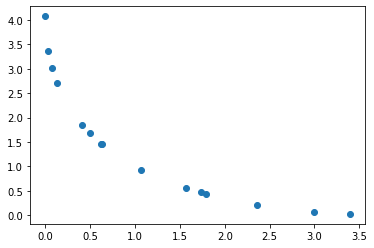

In [133]:
plotfront(mejor["value"])